In [1]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, DoubleType
import pandas as pd
from iso3166 import countries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

##Raw data processing

In [3]:
a = spark.read.json("/FileStore/tables/rapku/Kickstarter_2018_02_15T03_20_44_743Z-cb297.json")

In [4]:
display(a)

created_at,data,id,robot_id,run_id,table_id
2018-02-15T15:17:39.42254,"List(80, I will be an artist-in-residence at Elsewhere Studios this summer, where I will stretch my wings and see where I land!, List(16760235, 54, Mixed Media, 1, 6, art/mixed media, List(List(http://www.kickstarter.com/discover/categories/art/mixed%20media))), 3596, US, 1325980505, List(List(https://ksr-ugc.imgix.net/assets/006/295/961/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?w=160&h=160&fit=crop&v=1461379194&auto=format&q=92&s=57d3cf86b953b13877053a9eb0b7a3f2, https://ksr-ugc.imgix.net/assets/006/295/961/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?w=160&h=160&fit=crop&v=1461379194&auto=format&q=92&s=57d3cf86b953b13877053a9eb0b7a3f2, https://ksr-ugc.imgix.net/assets/006/295/961/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?w=40&h=40&fit=crop&v=1461379194&auto=format&q=92&s=c82e792178047287b48a37d06ac26466), null, 483835381, true, Hilary Emerson Lay, hilaryemersonlay, List(List(https://api.kickstarter.com/v1/users/483835381?signature=1518794258.f01f6dbe22f25adbfb1a0b9bf0637e8e49e1f0f6), List(https://www.kickstarter.com/profile/hilaryemersonlay))), USD, $, true, USD, 1334866560, false, null, 1.0, 2800.0, 1562040083, null, false, null, 1332969260, List(US, Paonia, CO, 2468066, false, Paonia, Paonia, Paonia, CO, paonia-co, CO, Town, List(List(https://api.kickstarter.com/v1/discover?signature=1518753993.05a59c69a5b76a1e1c451c4b1bc0c8b5cf840cc7&woe_id=2468066), List(https://www.kickstarter.com/discover/places/paonia-co, https://www.kickstarter.com/locations/paonia-co))), Elsewhere Studios artist-in-residency program!, null, List(https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=1024&h=576&fit=crop&v=1463680809&auto=format&q=92&s=7e1a9ded6a91f25ffb69652c20b17633, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=1552&h=873&fit=crop&v=1463680809&auto=format&q=92&s=e849392efcd453bd180efafa5c8e7fb7, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=352&h=198&fit=crop&v=1463680809&auto=format&q=92&s=826fac0fbc596ab0b0241bf7f56860bc, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=560&h=315&fit=crop&v=1463680809&auto=format&q=92&s=eccd9a1a64ed6ed0111efcba340d116b, assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=208&h=117&fit=crop&v=1463680809&auto=format&q=92&s=1e7f3e26c7f9194ed410b052186fa1ca, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=272&h=153&fit=crop&v=1463680809&auto=format&q=92&s=77ca95158c27de0e31c3c931ab6dc55a, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=160&h=90&fit=crop&v=1463680809&auto=format&q=92&s=bfbc30ad8a4c7082b6293519f9c436ab, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=48&h=27&fit=crop&v=1463680809&auto=format&q=92&s=8a3c0883a3f386bd1e9be12a158e5368), 3596.0, List(null, null, 0.8, null, List(null, List(https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=560&h=315&fit=crop&v=1463680809&auto=format&q=92&s=eccd9a1a64ed6ed0111efcba340d116b, https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=1552&h=873&fit=crop&v=1463680809&auto=format&q=92&s=e849392efcd453bd180efafa5c8e7fb7)), 69198, null, null, null, null, null, 69198, true, false, inactive, 1425915804, null), elsewhere-studios-artist-in-residency-program, https://www.kickstarter.com/discover/categories/art, true, false, successful, 1334866560, 1.0, List(null, List(null, https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program?ref=catego

In [5]:
summary = a.select('data.id', 'data.blurb', F.split('data.category.slug', '/')[0].alias('maincat'), 'data.category.name', 'data.backers_count', 'data.state',\
                   F.from_unixtime('data.launched_at').alias('date_launch'), F.month(F.from_unixtime('data.launched_at')).alias('month'), F.year(F.from_unixtime('data.launched_at')).alias('year'),\
                   F.from_unixtime('data.deadline').alias('deadline'), F.datediff(F.from_unixtime('data.deadline'), F.from_unixtime('data.launched_at')).alias('days_run'),\
                   'data.location.country', F.col('data.location.state').alias('country_state'),'data.location.short_name',\
                   'data.spotlight', 'data.staff_pick', 'data.currency',\
                   'data.goal', 'data.fx_rate', F.col('data.usd_pledged').cast('double').alias('usd_pledged'))
summary = summary.withColumn('usd_goal', summary['goal']*summary['fx_rate'])
summary = summary.dropDuplicates(['id'])
mapping = summary.select('id', 'maincat', 'backers_count', 'state', 'country', 'country_state', 'short_name', 'year', 'usd_pledged')
ml = summary.select('id', 'blurb', 'state', 'maincat','month', 'days_run', 'staff_pick', 'usd_goal')
backer = summary.select('backers_count', 'usd_pledged', 'year', 'month')

In [6]:
display(summary.select('blurb','date_launch', 'deadline', 'days_run').sort(F.desc('days_run')))

blurb,date_launch,deadline,days_run
Uptown Praise Bands recording of their 2nd album on the Spirit Filled Productions Label.,2010-12-31 18:38:44,2011-04-02 17:38:44,92
"Vincent 1979 examines post sexual-revolution Boston and the radical effects certain decisions have on marriage, friendship and family.",2010-12-31 17:12:36,2011-04-02 16:12:36,92
Angie McClure is in the process of recording her first album and YOU can help be a part of it!,2011-01-02 06:39:52,2011-04-04 05:39:52,92
"Classic honkytonk sound, clever lyrics, and singalong, hook filled melodies that are timeless yet fresh, original and full of surprises",2010-12-31 09:05:54,2011-04-02 08:05:54,92
Be a part of Snipe history! Support this exciting documentary and help begin editing this project for the Snipe's 80th Anniversary.,2010-12-29 22:22:08,2011-03-31 21:22:08,92
Up For Nothing has devoted nearly a decade to playing music for the love of music... Help send them on a month long tour!,2010-12-30 04:00:03,2011-04-01 03:00:03,92
Music for the masses and the funny bone.,2010-12-29 23:53:47,2011-03-31 22:53:47,92
"Special book about giving up everything for your dreams. This is a true story, poem about a time travel.",2011-01-07 19:04:15,2011-04-08 18:04:15,91
This is a symphony/recording of the symphony that will reflect on the events of 9/11 ten years later. It is a memorial.,2011-03-26 07:23:52,2011-06-25 07:23:52,91
"Be a part of creating our next album. Pre-order the new album, house parties, songs named after you, and more.",2011-02-01 03:34:36,2011-05-03 02:34:36,91


In [7]:
display(summary.filter(summary.currency == 'NZD').select('blurb', 'goal', 'usd_pledged', 'usd_goal'))

blurb,goal,usd_pledged,usd_goal
"Pre-Order this Ancient Mantra Music that has helped heal me & many others from Depression, Anxiety & Disconnection.",25000.0,3272.43195495,18435.014750000002
"Build a goblin village! Manage a chaotic tribe! Survive Winter! Expand, Trade and Conquer! Commune with the Gods! Be the Goblin King!",40000.0,37130.16208561,29496.0236
"Minimalistic & Chic, Unisex Timepieces. Inspired by the Individual and Their Surroundings.",16000.0,1839.2132202,11798.40944
"Hi , people love food, we offer that taste of NZ, delivered to your workplace, a taste to remember, and you can be part of this journey",10000.0,0.0,7374.0059
I am making a fan-made martial arts movie about Nightwings first night in Buldhaven,250.0,113.5076443,184.3501475
A Chapter Book for boys who don't like Chapter Books!,1000.0,1236.39122805,737.40059
Forget clichés. Arlo gives you jewellery with SOUL. Made in New Zealand and New York City.,5000.0,4636.7715116,3687.00295
Who drinks Craft Beer and why? Join me to find out in my applied research project thesis for a Masters in Applied Management at S.I.T.,1000.0,3.99253398,737.40059
"A choral concert inspired by Eastern Orthodoxy in the magical setting of the Greek Orthodox Church in Wellington, NZ—by Baroque Voices.",3300.0,2473.9594165,2433.4219470000003
"StickyKnucklz is looking to fund another insane House Music Video Mix series, The world needs more of what these guys have to offer!!!",480.0,338.10421,353.9522832


In [8]:
display(summary.select('currency').distinct())

currency
DKK
NZD
GBP
CHF
CAD
EUR
NOK
AUD
JPY
HKD


In [9]:
display(summary.select('maincat').distinct())

maincat
art
publishing
film & video
technology
food
journalism
dance
photography
games
crafts


In [10]:
display(summary.select('state').distinct())

state
suspended
failed
canceled
successful
live


In [11]:
display(summary.select('year').distinct())

year
2018
2015
2013
2014
2012
2009
2016
2010
2011
2017


##Question 1: 
### Kickstarter provides a location tag for creators. Using this, can we find if Kickstarter projects are concentrated in certain geographics locations? Are some project categories similarly concentrated?

In [13]:
mapping.printSchema()

root
-- id: long (nullable = true)
-- maincat: string (nullable = true)
-- backers_count: long (nullable = true)
-- state: string (nullable = true)
-- country: string (nullable = true)
-- country_state: string (nullable = true)
-- short_name: string (nullable = true)
-- year: integer (nullable = true)
-- usd_pledged: double (nullable = true)

In [14]:
def alpha3(alpha2_str):
  try:
    return countries.get(alpha2_str).alpha3
  except Exception:
    return 'ZZZ'

alpha3_udf = udf(alpha3, StringType())

In [15]:
map2 = mapping.withColumn('alpha3', alpha3_udf(mapping.country))
map2 = map2.filter(map2.alpha3 != 'ZZZ')

####General Kickstarter Projects:
Kickstarter indicates where the project will be located in, not necessarily where the project was started. This means a person in the United States can indicate their project is located in Sri Lanka if it involves traveling there.

Based on the mapping of the PySpark DataFrame below, most Kickstarters are concentrated in the United States (148217 vs. next highest at 15993 (UK)). Because of this, the focus of the next maps will be on Kickstarter projects located in the United States, and how concentrated projects are per state.

In [17]:
display(map2.groupBy('alpha3').count())

alpha3,count
PSE,18
HTI,46
POL,111
LVA,29
BRB,4
JAM,22
ZMB,9
BRA,111
ARM,10
MOZ,7


In [18]:
USmap = map2.filter(map2.alpha3=='USA')\
.withColumn('success', F.when(map2['state']=='successful', 1).otherwise(0).alias('success'))\
.withColumn('fail', F.when(map2['state']=='failed', 1).otherwise(0).alias('fail'))

####US-based Kickstarter Projects:
Based on the provided data, majority of Kickstarter projects are initiated in California and New York, with a significant volume coming from Texas, Washington, Illinois, and Florida as well. Most of the main categories of Kickstarter projects also fall under this pattern, with one notable exception: Texas and eastern states seem to have a significant number of projects under the crafts category.

Aside from this, I also noted the average USD pledged per state for successful Kickstarter projects. The West Coast as a whole seems to have much better financial performance. Again, California dominates this category, but interestingly, New York doesn't share this characteristic, which may note Kickstarters in California having more ambitious funding goals, while New York Kickstarters focusing on small-scale or personal projects. Notrable as well is Utah's average USD pledged, despite having a low number of Kickstarter projects. 

Also, Kickstarter projects that end up as successes seem to have a wider distribution around the US. While California and New York still have very strong performances for Kickstarters originating there, all states show around a 50% success rate for getting funding for their Kickstarter project. We'll explore if this may be due to lower goals or project specifications.

In [20]:
clust_USmap = USmap.groupBy('country_state').count()
display(clust_USmap)

country_state,count
SC,1020
AZ,2580
LA,1259
MN,2430
NJ,2163
DC,1454
OR,3566
VA,2557
RI,529
KY,976


In [21]:
proj = USmap.filter(USmap['maincat'] == 'crafts').groupBy('country_state').count()
display(proj) #number of projects

country_state,count
SC,62
AZ,97
LA,44
MN,64
NJ,69
DC,23
OR,123
VA,118
RI,10
KY,43


In [22]:
ave = USmap.filter(USmap.state == 'successful').groupBy('country_state').avg() #Amount pledged
display(ave)

country_state,avg(id),avg(backers_count),avg(year),avg(usd_pledged),avg(success),avg(fail)
AZ,1.0640061938626466E9,208.77303182579564,2013.6222780569515,14301.315240775337,1.0,0.0
SC,1.0656678700109409E9,116.03938730853392,2013.512035010941,9804.433130009487,1.0,0.0
LA,1.035993759244186E9,125.6438953488372,2013.1235465116279,8906.257877194777,1.0,0.0
MN,1.0740630226574137E9,197.22004062288423,2013.5348679756262,18489.334102911307,1.0,0.0
NJ,1.0651568325951662E9,150.6465256797583,2013.6173212487413,10118.543675730114,1.0,0.0
DC,1.0657777176105651E9,214.6056511056511,2013.4447174447175,15952.764545454547,1.0,0.0
OR,1.0716716229766623E9,215.40642888595332,2013.2928225451344,15255.265510963332,1.0,0.0
VA,1.1004152719E9,175.9483606557377,2013.8180327868852,13840.013147978036,1.0,0.0
RI,9.9359748512E8,138.9876923076923,2013.2153846153847,13837.545384615381,1.0,0.0
KY,1.0969608807591743E9,169.98853211009174,2013.7431192660551,11246.398040891047,1.0,0.0


In [23]:
pcsuccess_map = USmap.groupBy('country_state').sum()
pcsuccess_map = pcsuccess_map.withColumn('ratio', pcsuccess_map['sum(success)']/(pcsuccess_map['sum(success)']+pcsuccess_map['sum(fail)']))
display(pcsuccess_map)

country_state,sum(id),sum(backers_count),sum(year),sum(usd_pledged),sum(success),sum(fail),ratio
SC,1089351841050,57855,2054529,4808641.101937536,457,483,0.48617021276595745
AZ,2761187614287,270733,5196629,1.9280226514624476E7,1194,1203,0.4981226533166458
LA,1328159609873,92288,2535364,6627167.895816637,688,483,0.587532023911187
MN,2620808796468,307992,4893937,2.8549587980000008E7,1477,830,0.6402254009536195
NJ,2342232708084,163034,4356744,1.1024702194282163E7,993,1010,0.4957563654518223
DC,1564181522679,183024,2928225,1.3691148212433599E7,814,547,0.5980896399706098
OR,3838586222997,518357,7181144,3.683369170804329E7,2271,1092,0.6752899197145406
VA,2773972701160,235729,5150661,1.815111090017825E7,1220,1150,0.5147679324894515
RI,529270608453,47688,1065290,4727327.6392807085,325,173,0.6526104417670683
KY,1054954366412,79620,1966049,5257805.005828497,436,452,0.49099099099099097


In [24]:
gamemap = USmap.filter(USmap['maincat'] == 'games').groupBy('country_state').sum()
gamemap = gamemap.withColumn('ratio', gamemap['sum(success)']/(gamemap['sum(success)']+gamemap['sum(fail)']))
display(gamemap) #ratio successful

country_state,sum(id),sum(backers_count),sum(year),sum(usd_pledged),sum(success),sum(fail),ratio
AZ,295278711705,100287,557971,4696108.429999998,181,70,0.7211155378486056
SC,55013172710,11308,104767,527878.990945536,23,24,0.48936170212765956
LA,49738166747,14834,96677,680682.3400000001,27,15,0.6428571428571429
MN,116366217888,21368,213522,1080592.5499999998,60,29,0.6741573033707865
NJ,166244799760,27716,302112,1155757.76,85,44,0.6589147286821705
DC,61094176910,36244,116839,1363762.4499999997,39,15,0.7222222222222222
OR,224003701742,85926,388692,4341296.27,125,48,0.7225433526011561
VA,183212963796,60723,346515,4403863.4,91,56,0.6190476190476191
RI,18771445233,3210,40287,248183.16999999998,10,8,0.5555555555555556
KY,88539841165,29823,171303,1536979.8598165,49,25,0.6621621621621622


####Adoption over time:
Lastly, I wanted to see if there have been differences in terms of state distribution of projects based on time. I chose to compare the earliest date available (2009) to the most complete year (2017) to see if concentration of projects changed over time.

Interestingly, it seems like Kickstarter's early adopters primarily came from creators in New York (355 projects), with California's 164 projects a close second. It's also notable to see that certain states didn't even have any Kickstarter projects during 2009, compared to 2017, where all states are represented in some manner. By 2017, we see that California now dominates in terms of number of projects being released.

###2009 Projects vs. 2017 Projects

In [27]:
proj2009 = USmap.filter(USmap['year'] == 2009).groupBy('country_state').count()
display(proj2009)

country_state,count
SC,3
AZ,3
LA,9
MN,6
NJ,11
DC,4
OR,11
VA,5
NH,1
MI,20


In [28]:
proj2017 = USmap.filter(USmap['year'] == 2017).groupBy('country_state').count()
display(proj2017)

country_state,count
AZ,255
SC,112
LA,112
MN,212
NJ,240
DC,146
OR,330
VA,296
RI,46
KY,114


##Question 2: 
### Which factors can help in predicting a Kickstarter project's performance (successfully funded or failed)?
* Subquestion: Which factors outside of the blurb are the most important in predicting Kickstarter project performance?

On exploration, some information from the Kickstarter data are post-campaign information, such as funding received and if it entered the Kickstarter's spotlight section, where successful projects selected by Kickstarter are allowed to tell their project's story. Because of this I wanted to focus on factors that are set at the start of the campaign (the category, month it launched, how long the project was kept, the funding goal). Additionally, I wanted to also explore if Kickstarter's Staff Pick, usually given to a project midway in its campaign by the Kickstarter staff, has an effect on predicting success.

In [30]:
ml = ml.filter(ml.state.isin(['successful', 'failed']))

In [31]:
splits = ml.randomSplit([0.8, 0.2], 1)
ml_train = splits[0]
ml_test = splits[1]

In [32]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors

In [33]:
label = StringIndexer(inputCol='state', outputCol='label')

maincat_index = StringIndexer(inputCol='maincat', outputCol='maincat_index')

featurelist = ['month', 'maincat_index','days_run', 'staff_pick', 'usd_goal']
vector = VectorAssembler(inputCols=featurelist, outputCol='features')

feature_cat = VectorIndexer(inputCol="features", outputCol="catfeature", maxCategories=12)

rforest = RandomForestClassifier(labelCol='label', featuresCol='catfeature', numTrees=10)

labelConverter = IndexToString(inputCol="prediction", outputCol="predictedlabel",
                               labels=label.fit(ml).labels)

In [34]:
pipeline = Pipeline(stages=[label, maincat_index, vector, feature_cat, rforest, labelConverter])
model = pipeline.fit(ml_train)
predictions = model.transform(ml_test)

In [35]:
display(predictions)

id,blurb,state,maincat,month,days_run,staff_pick,usd_goal,label,maincat_index,features,catfeature,rawPrediction,probability,prediction,predictedlabel
10772847,"To design and build a rocket capable of reaching the moon costing $5,000 or less for all hardware and software.",failed,technology,10,45,false,25000.0,1.0,2.0,"List(1, 5, List(), List(10.0, 2.0, 45.0, 0.0, 25000.0))","List(1, 5, List(), List(9.0, 2.0, 45.0, 0.0, 25000.0))","List(1, 2, List(), List(2.875923995888015, 7.124076004111985))","List(1, 2, List(), List(0.2875923995888015, 0.7124076004111985))",1.0,failed
15776568,"Now you can learn cursive in a fun, NSFW way.",failed,publishing,10,30,false,5500.0,1.0,4.0,"List(1, 5, List(), List(10.0, 4.0, 30.0, 0.0, 5500.0))","List(1, 5, List(), List(9.0, 4.0, 30.0, 0.0, 5500.0))","List(1, 2, List(), List(5.179755511140106, 4.820244488859894))","List(1, 2, List(), List(0.5179755511140106, 0.4820244488859894))",0.0,successful
30365270,"""Remnants of a Deeper Purity"" turns 18 with a deluxe 2-LP swirled vinyl edition. Some rewards have a signed holiday card for you.",successful,music,11,22,true,7000.0,0.0,0.0,"List(1, 5, List(), List(11.0, 0.0, 22.0, 1.0, 7000.0))","List(1, 5, List(), List(10.0, 0.0, 22.0, 1.0, 7000.0))","List(1, 2, List(), List(9.0732045390369, 0.9267954609631012))","List(1, 2, List(), List(0.9073204539036899, 0.09267954609631011))",0.0,successful
35185748,~Let elegance be an obsession not put you in oppression.~,failed,fashion,10,60,false,5000.0,1.0,7.0,"List(1, 5, List(), List(10.0, 7.0, 60.0, 0.0, 5000.0))","List(1, 5, List(), List(9.0, 7.0, 60.0, 0.0, 5000.0))","List(1, 2, List(), List(4.721019842883574, 5.278980157116425))","List(1, 2, List(), List(0.47210198428835737, 0.5278980157116425))",1.0,failed
40001581,uPixy - Install your operation system and software choices from an easy to use menu. Surf securely while traveling abroad.,failed,technology,1,30,false,100000.0,1.0,2.0,"List(1, 5, List(), List(1.0, 2.0, 30.0, 0.0, 100000.0))","List(1, 5, List(), List(0.0, 2.0, 30.0, 0.0, 100000.0))","List(1, 2, List(), List(1.0056240605699305, 8.99437593943007))","List(1, 2, List(), List(0.10056240605699304, 0.8994375939430069))",1.0,failed
63530552,The first HackerSpace that will change the future of college students and inspire the world.,failed,technology,7,30,false,40000.0,1.0,2.0,"List(1, 5, List(), List(7.0, 2.0, 30.0, 0.0, 40000.0))","List(1, 5, List(), List(6.0, 2.0, 30.0, 0.0, 40000.0))","List(1, 2, List(), List(2.253786716630465, 7.746213283369534))","List(1, 2, List(), List(0.2253786716630465, 0.7746213283369534))",1.0,failed
77838407,"My goal is to make one of the best tasting Sweet, Hot and Spicy Jerky!",failed,food,10,30,false,1000.0,1.0,5.0,"List(1, 5, List(), List(10.0, 5.0, 30.0, 0.0, 1000.0))","List(1, 5, List(), List(9.0, 5.0, 30.0, 0.0, 1000.0))","List(1, 2, List(), List(4.919311302877752, 5.080688697122248))","List(1, 2, List(), List(0.4919311302877752, 0.5080688697122249))",1.0,failed
78245859,Virtual reality gaming venue for all ages with a twist. Vr experience of tomorrow.,failed,games,6,30,false,50000.0,1.0,6.0,"List(1, 5, List(), List(6.0, 6.0, 30.0, 0.0, 50000.0))","List(1, 5, List(), List(5.0, 6.0, 30.0, 0.0, 50000.0))","List(1, 2, List(), List(2.481720692315378, 7.518279307684622))","List(1, 2, List(), List(0.2481720692315378, 0.7518279307684622))",1.0,failed
84077353,A podcast host investigating corruption in a small mining town stumbles upon a secret race of werewolves in this 10 episode webseries.,successful,film & video,8,26,false,100000.0,0.0,1.0,"List(1, 5, List(), List(8.0, 1.0, 26.0, 0.0, 100000.0))","List(1, 5, List(), List(7.0, 1.0, 26.0, 0.0, 100000.0))","List(1, 2, List(), List(0.9951540060820008, 9.004845993918))","List(1, 2, List(), List(0.09951540060820008, 0.9004845993918))",1.0,failed
88082565,"“Let food be thy medicine and medicine be thy food.” Hippocrates, (460 – c. 370 BC) -> ""We give you the tools"" Juan Arias, 2014 AC",failed,technology,8,45,false,10000.0,1.0,2.0,

In [36]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")
acc = evaluator.evaluate(predictions)
acc

Out[ 30 ]: 0.6883978573167763

In [37]:
df_importance = pd.DataFrame(data={'features': featurelist, 'importance': model.stages[-2].featureImportances})
df_importance = df_importance.sort_values(by='importance', ascending=False)
df_importance

Out[ 31 ]: 
 features importance
3 staff_pick 0.419387
4 usd_goal 0.391199
1 maincat_index 0.160883
2 days_run 0.026706
0 month 0.001825

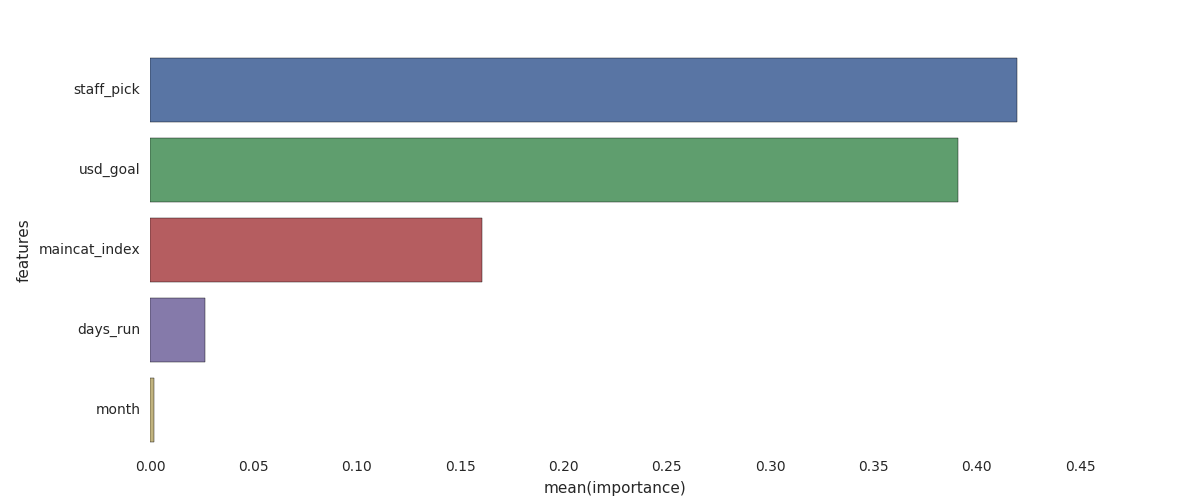

In [38]:
f, ax = plt.subplots(figsize=(12, 5))
sns.set(style="darkgrid")
sns.barplot(y="features",x="importance",data=df_importance)

display(f.figure)

Logistic Regression

In [40]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, CountVectorizer, StopWordsRemover
from pyspark.ml.classification import LogisticRegression

In [41]:
def indices_to_terms(vocabulary):
    def indices_to_terms(xs):
        return [vocabulary[int(x)] for x in xs]
    return udf(indices_to_terms, ArrayType(StringType()))

In [42]:
tokenizer = Tokenizer(inputCol="blurb", outputCol="words")
stopWordsRemover = StopWordsRemover(inputCol="words", outputCol="clean_words")
vectorizer = CountVectorizer(inputCol="clean_words", outputCol="features", vocabSize=25000, minDF=3)
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

In [43]:
pipeline2 = Pipeline(stages=[tokenizer, stopWordsRemover, vectorizer, label])
model2 = pipeline2.fit(ml).transform(ml)

In [44]:
splitter = model2.randomSplit([0.8, 0.2], 1)
ml_train2 = splitter[0]
ml_test2 = splitter[1]

In [45]:
lrModel = lr.fit(ml_train2)
lrPredictions = lrModel.transform(ml_test2)

In [46]:
acc2 = evaluator.evaluate(lrPredictions)
acc2

Out[ 39 ]: 0.6775626978329681

##Question 3: 
### For successful projects, are there trends in terms of the campaign length, or funding goal (in USD)?

In [48]:
dssa = summary.select('blurb','state', 'maincat','days_run', 'usd_pledged','usd_goal')
dssa = dssa.withColumn('fund2goal', dssa['usd_pledged']/dssa['usd_goal'])
dssa = dssa.filter(dssa['state'] =='successful').toPandas()

In [49]:
dssa.describe()

Out[ 66 ]: 
 days_run usd_pledged usd_goal fund2goal
count 91355.000000 9.135500e+04 9.135500e+04 91355.000000
mean 32.697105 1.934307e+04 9.200678e+03 6.085634
std 12.314202 1.120956e+05 3.049933e+04 231.876434
min 1.000000 1.000000e+00 1.000000e-02 0.842815
25% 30.000000 1.826494e+03 1.200000e+03 1.046000
50% 30.000000 4.686000e+03 3.500000e+03 1.167592
75% 35.000000 1.156201e+04 9.000000e+03 1.572004
max 92.000000 1.026685e+07 2.000000e+06 41535.010000

In [50]:
dssa.quantile([0.1, 0.99]) #98% of data

Out[ 41 ]: 
 days_run usd_pledged usd_goal fund2goal
0.10 20.0 747.000000 500.0 1.008333
0.99 76.0 250606.470455 97946.0 20.852178

In [51]:
stats.percentileofscore(dssa.usd_goal, 10000)

Out[ 69 ]: 78.406764818564938

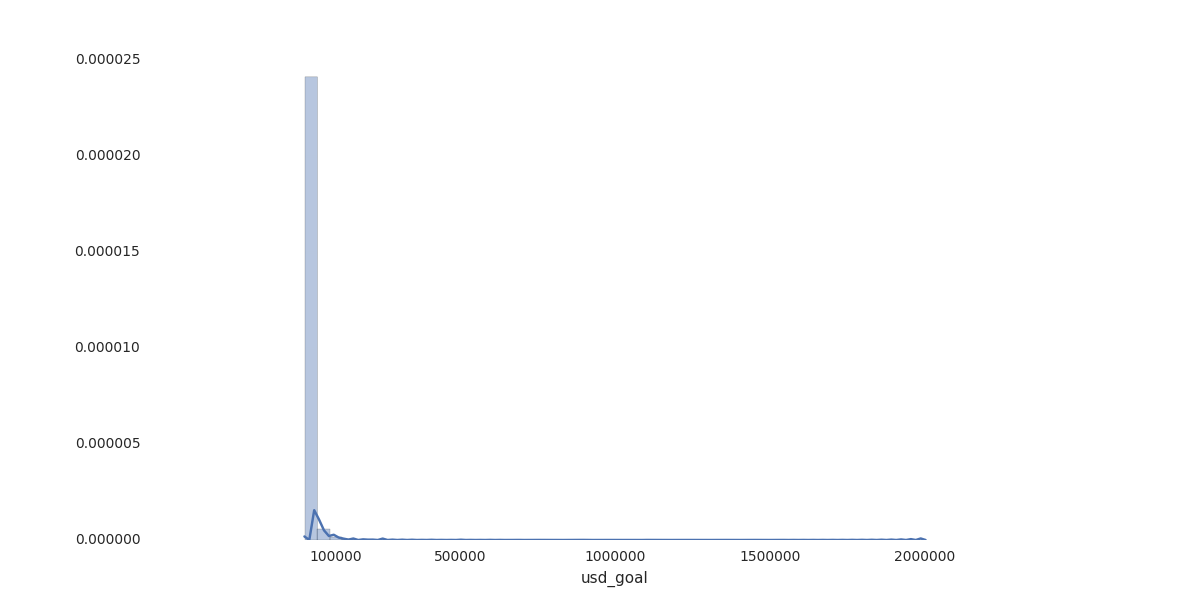

In [52]:
f, ax = plt.subplots(figsize=(12,6)) 
sns.distplot(dssa.usd_goal, bins=50)
ax.set_xticks([100000,500000, 1000000, 1500000, 2000000])
display(f)

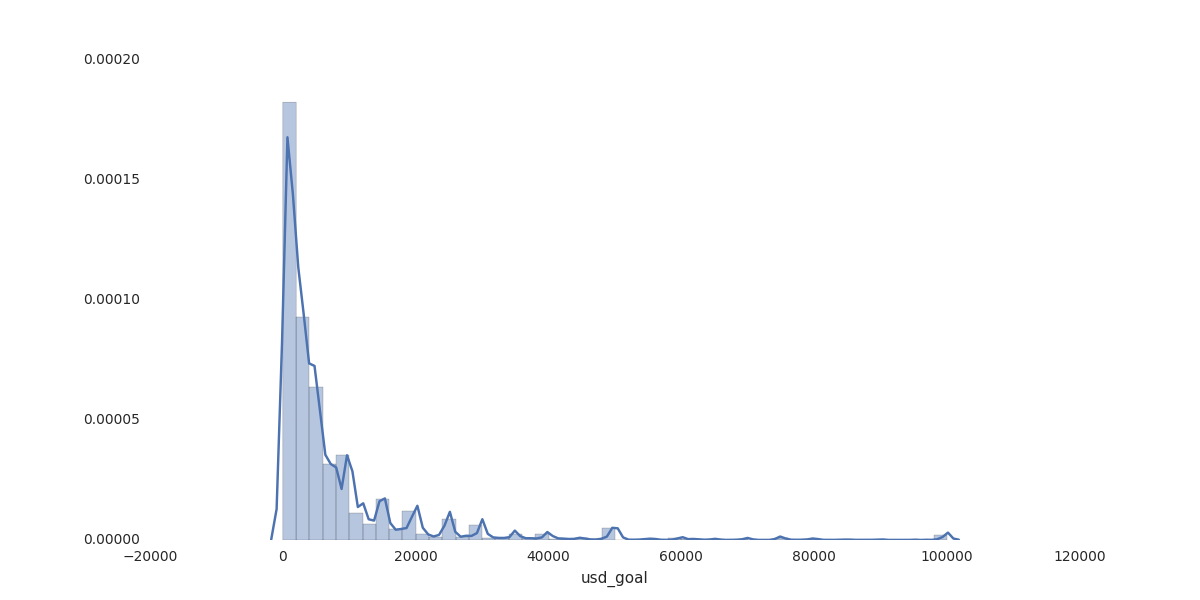

In [53]:
f, ax = plt.subplots(figsize=(12,6)) 
sns.distplot(dssa[dssa.usd_goal<=100000].usd_goal)
display(f)

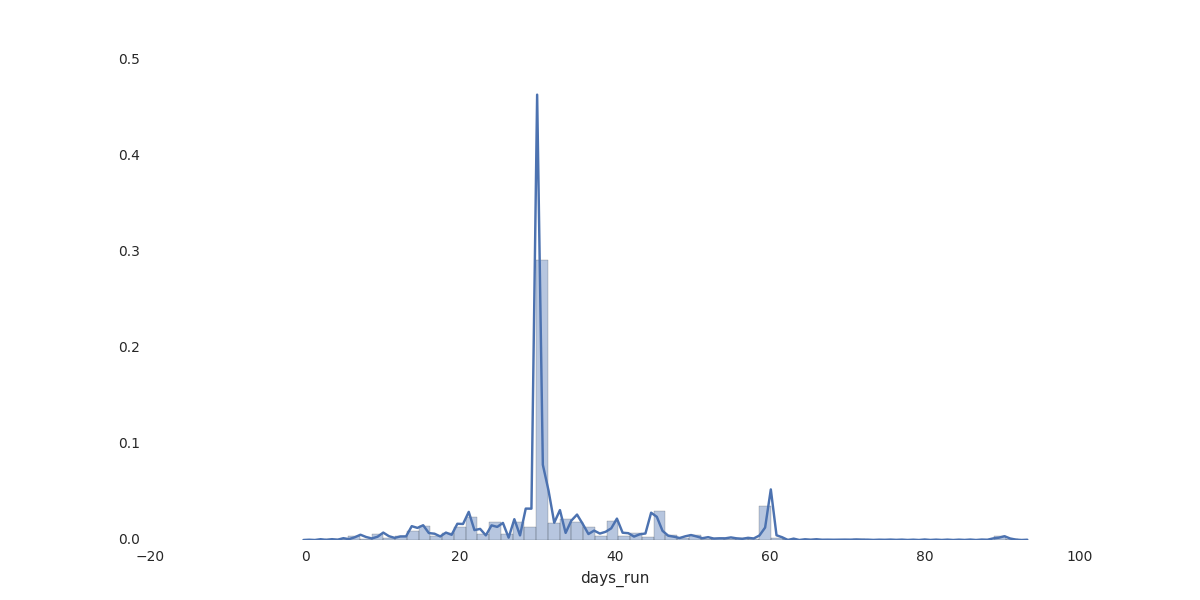

In [54]:
f, ax = plt.subplots(figsize=(12,6)) 
sns.distplot(dssa.days_run, bins=60)
display(f)

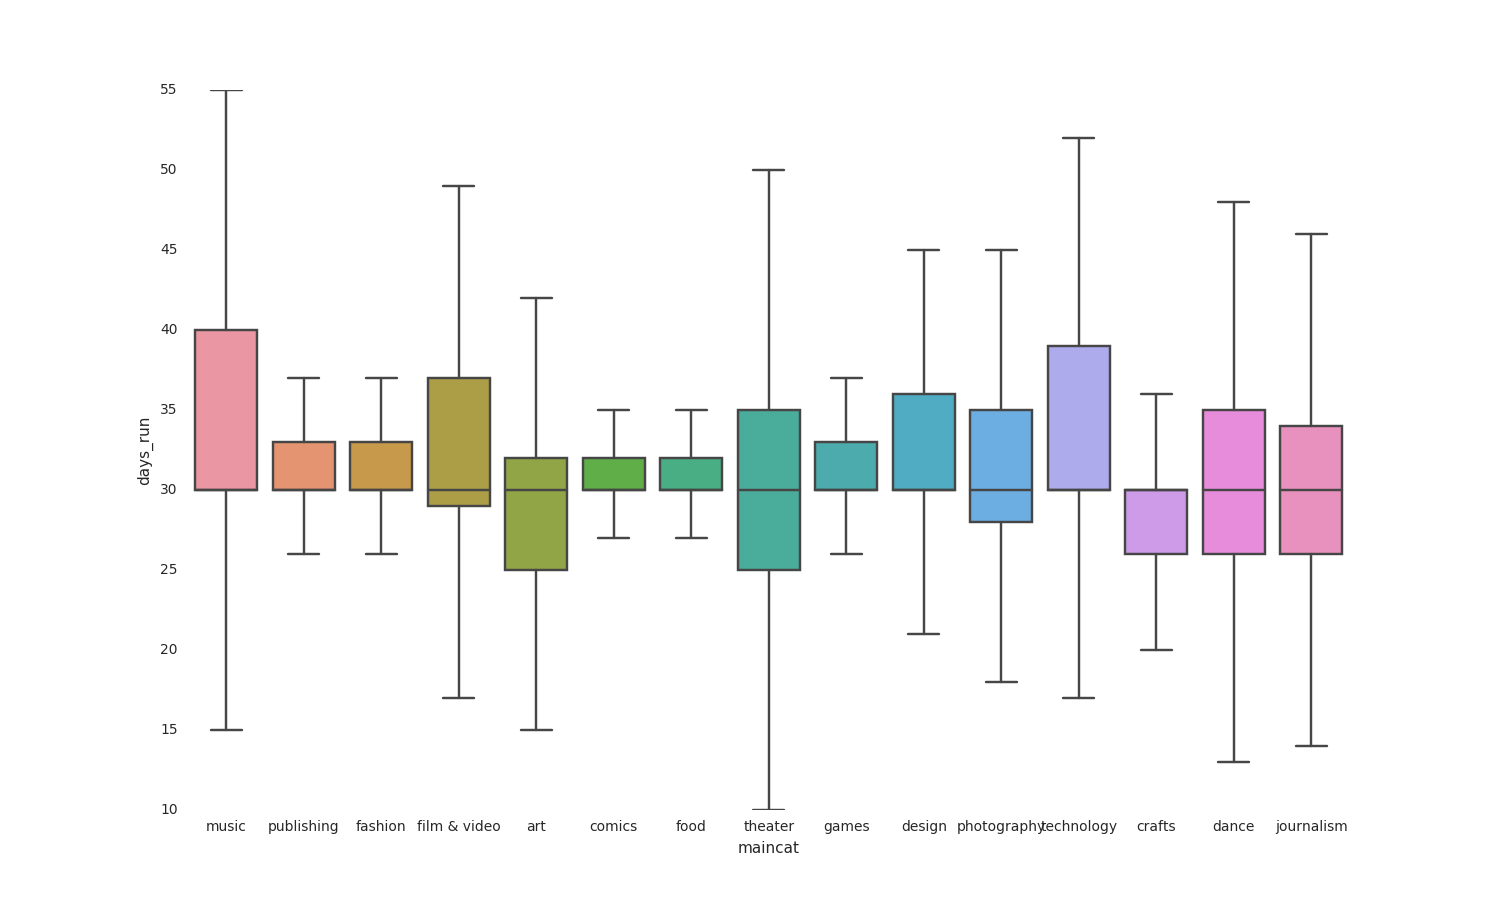

In [55]:
#total kickstarter
f, ax = plt.subplots(figsize=(15,9))
sns.boxplot(y=dssa.days_run, x=dssa.maincat, showfliers=False)
display(f)

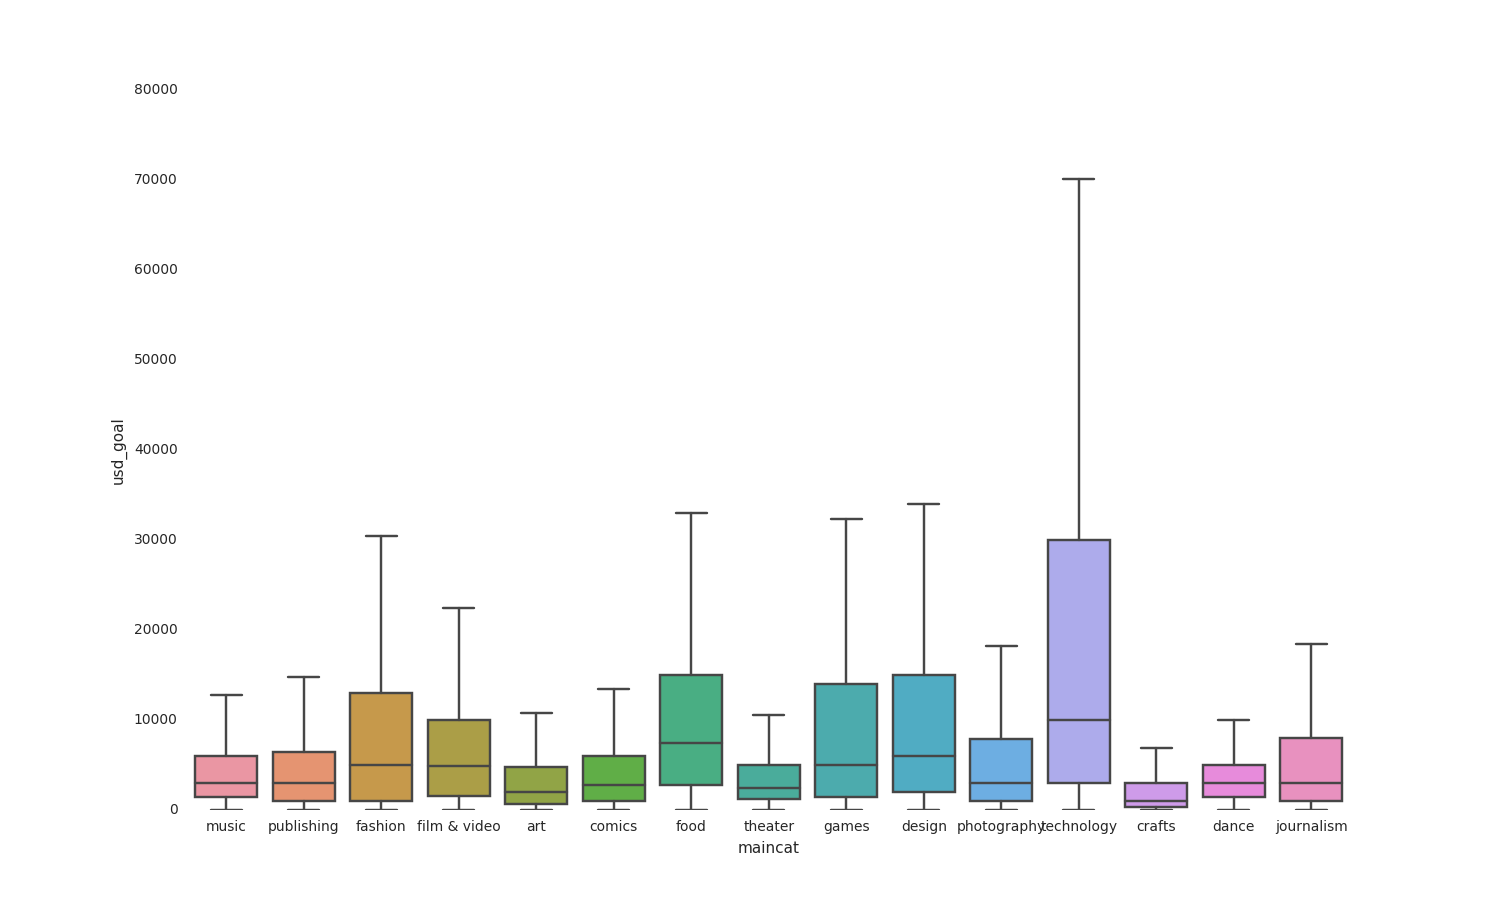

In [56]:
#all projects
f, ax = plt.subplots(figsize=(15,9))
sns.boxplot(y=dssa.usd_goal, x=dssa.maincat, showfliers=False)
display(f)

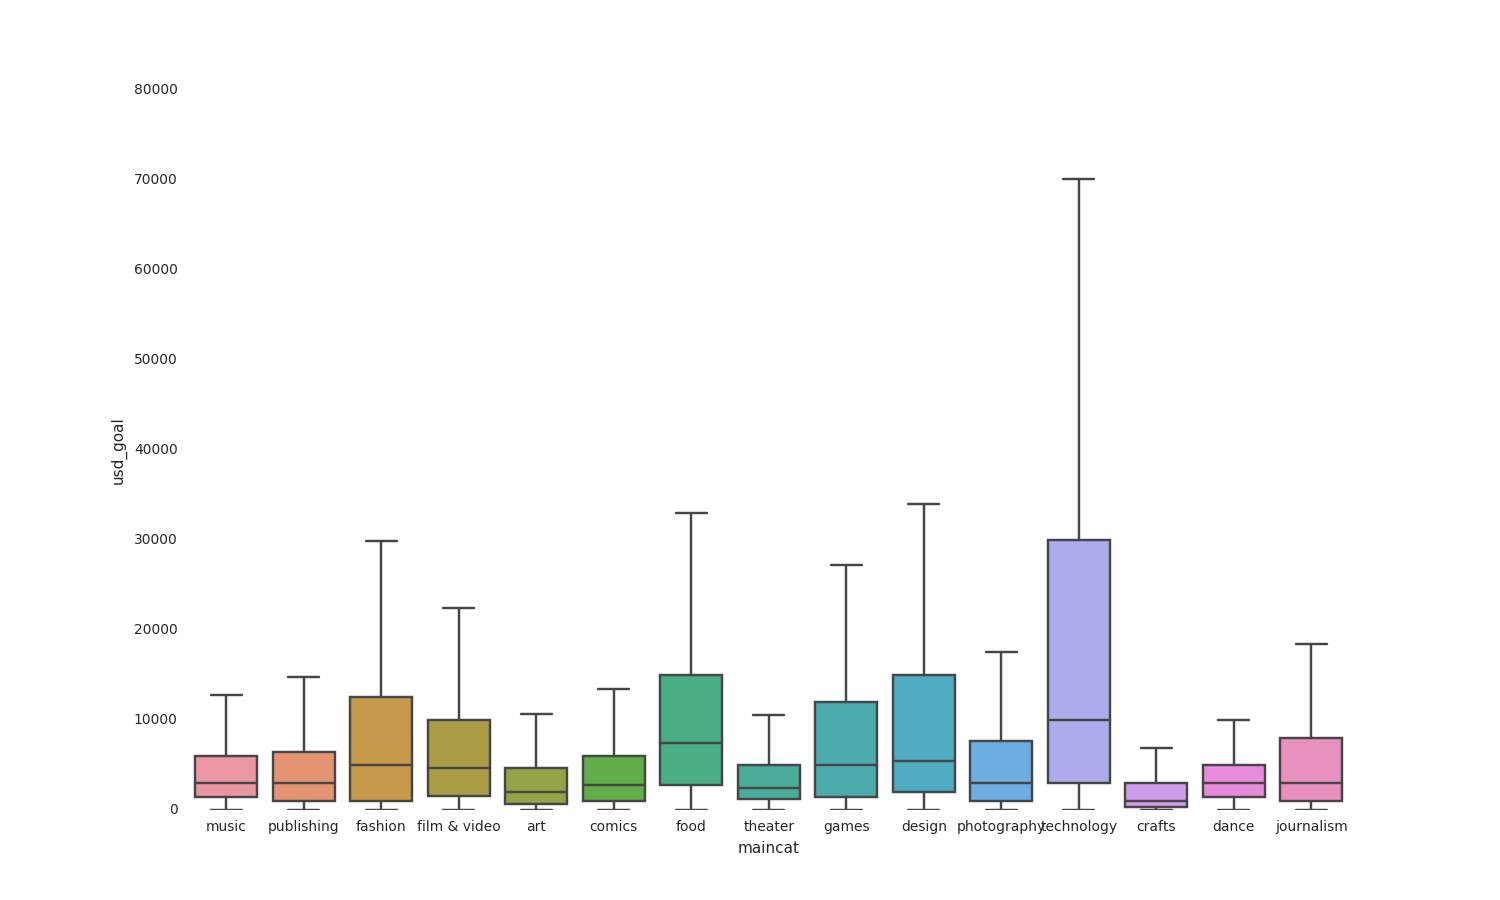

In [57]:
#small projects
smol = dssa[dssa.usd_goal <= 100000]
f, ax = plt.subplots(figsize=(15,9))
sns.boxplot(y=smol.usd_goal, x=smol.maincat, showfliers=False)
display(f)

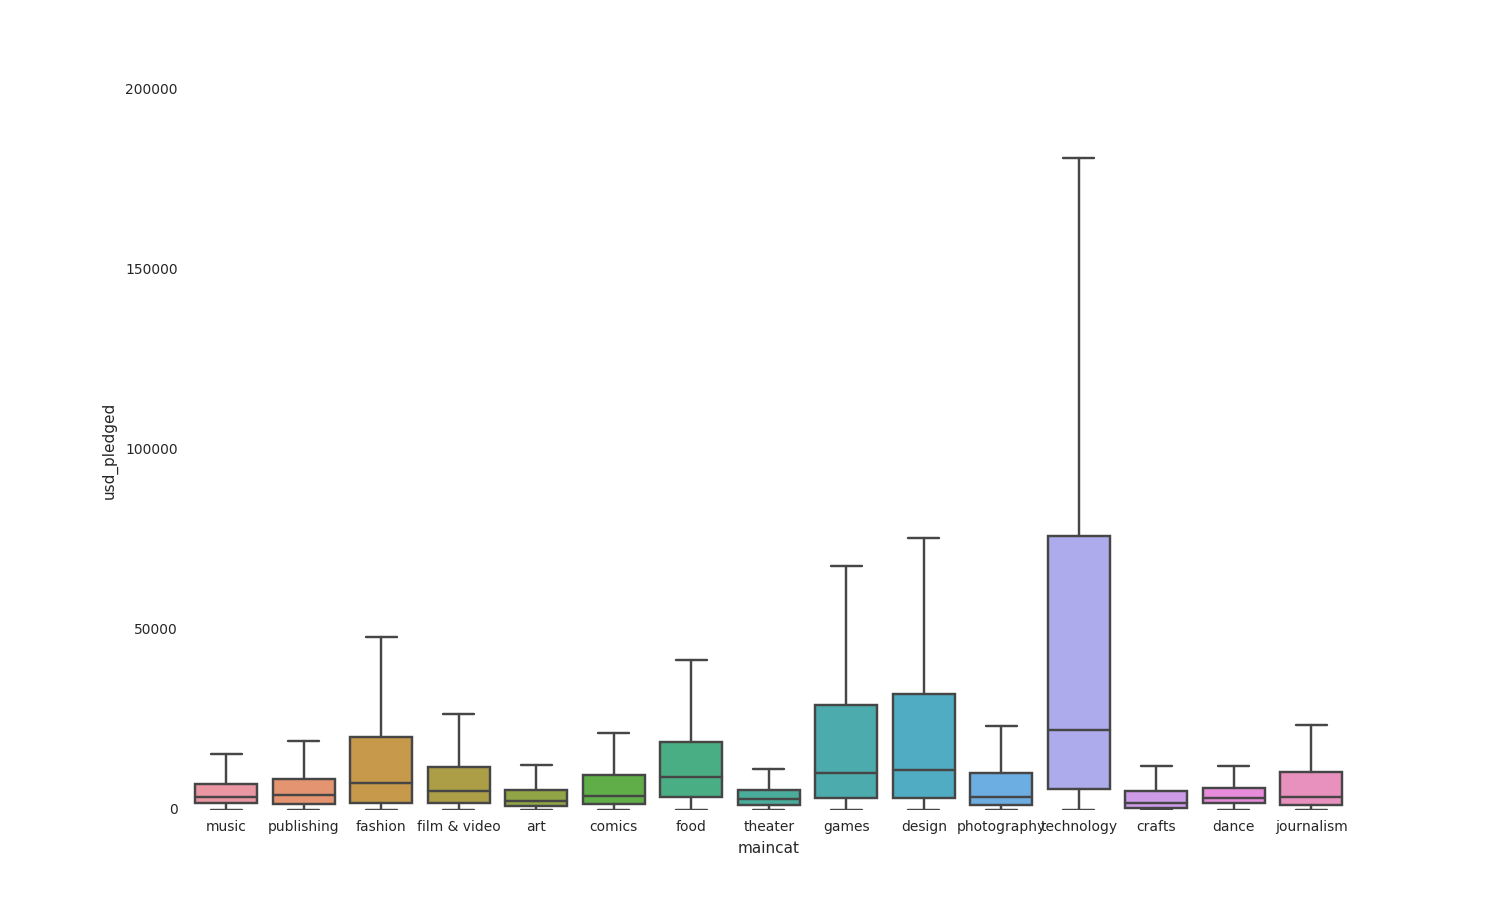

In [58]:
f, ax = plt.subplots(figsize=(15,9))
sns.boxplot(y=dssa.usd_pledged, x=dssa.maincat, showfliers=False)
display(f)

In [59]:
dssa.usd_goal.corr(dssa.usd_pledged)

Out[ 50 ]: 0.62988657530226022

##Question 4: 
### When did the average Kickstarter backer spend the most money? What information can we gather based on this?

Given that we have both the total pledges and number of backers per Kickstarter, it would be interesting to see if the dataset can tell us about the behavior of backers - that is, people who provide funding in Kickstarter.

In [61]:
hm = backer.toPandas()

In [62]:
hm = hm[hm.year != 2018]
hm_grp = hm.groupby(['month', 'year']).sum()
hm_grp['USDpax'] = hm_grp.usd_pledged/hm_grp.backers_count
hm_grp_money = hm_grp.USDpax.unstack().fillna(0)

####Backers over the years, and USD/backer
Based on the heatmap below, the peak of Kickstarter in terms of backers, would be 2012-2013. Current backer levels seem to have stabilized, compared to March 2013's 750,000+ backers providing funding to projects.

Despite the reduction of backers, however, backers are now spending more USD per backer as well, with peaks being noted in 2016-2017.

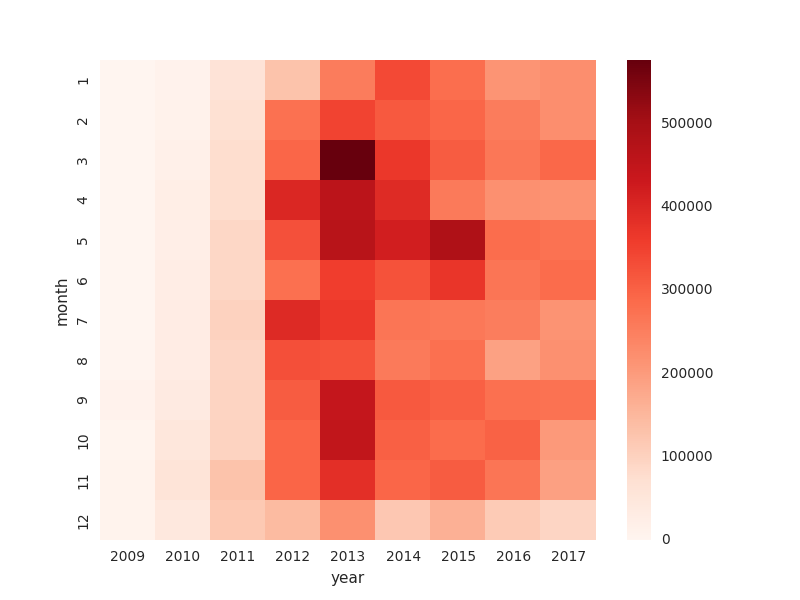

In [64]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(hm_grp['backers_count'].unstack().fillna(0), cmap="Reds")
display(f)

In [65]:
display(summary.filter((summary.year == 2013) & (summary.month == 3)).orderBy(['backers_count'], ascending=False))

id,blurb,maincat,name,backers_count,state,date_launch,month,year,deadline,days_run,country,country_state,short_name,spotlight,staff_pick,currency,goal,fx_rate,usd_pledged,usd_goal
1755266685,UPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!,film & video,Narrative Film,91585,successful,2013-03-13 14:42:22,3,2013,2013-04-13 03:00:00,31,US,CA,"San Diego, CA",true,true,USD,2000000.0,1.0,5702153.38,2000000.0
286165030,A story-driven CRPG set in the world of Monte Cook's Numenera. We are deeply appreciative to all of you who made this possible.,games,Video Games,74405,successful,2013-03-06 13:47:37,3,2013,2013-04-06 00:00:00,31,US,CA,"Newport Beach, CA",true,true,USD,900000.0,1.0,4188927.49,900000.0
1156271755,"Lord British returns to his fantasy RPG roots with Shroud of the Avatar, hearkening back to his innovative early work.",games,Video Games,22322,successful,2013-03-08 15:57:29,3,2013,2013-04-07 14:57:29,30,US,TX,"Austin, TX",true,true,USD,1000000.0,1.0,1919275.99,1000000.0
1238582157,"Divinity Original Sin is an old-school cRPG with new ideas & modern execution, will release this year. Funded by fantastic backers!",games,Video Games,19541,successful,2013-03-27 16:11:26,3,2013,2013-04-26 16:11:26,30,BE,Oost-Vlaanderen,"Ghent, Belgium",true,true,USD,400000.0,1.0,944282.65,400000.0
1121258628,A groundbreaking love letter to 8 bits!,games,Video Games,14749,successful,2013-03-15 02:59:57,3,2013,2013-04-14 02:59:57,30,US,CA,"Los Angeles, CA",true,true,USD,75000.0,1.0,311502.58,75000.0
658110891,High technology meets your house plants. This smart garden lets everyone grow fresh herbs at home.,technology,Hardware,10477,successful,2013-03-27 12:02:49,3,2013,2013-04-30 17:01:00,34,US,CA,"Palo Alto, CA",true,true,USD,75000.0,1.0,625851.72,75000.0
1191700740,"EVERY STITCH TELLS A STORY: A Premium Sweatshirt Designed for Life, Guaranteed for a Decade and Backed with FREE Mending!",fashion,Apparel,9226,successful,2013-03-07 19:44:36,3,2013,2013-04-21 18:44:04,45,US,NY,"Lower East Side, NY",true,false,USD,50000.0,1.0,1053830.62,50000.0
1692752007,The follow up to the hit boardgame of 2012! More Zombie action with tons of great miniatures and fast paced rules!,games,Tabletop Games,8944,successful,2013-03-02 15:59:42,3,2013,2013-03-31 23:59:00,29,US,GA,"Atlanta, GA",true,true,USD,25000.0,1.0,2255018.04,25000.0
1759781298,"Thermodo is a tiny electrical thermometer that measures the temperature right where you are. iPhone, iPad, Android & more",technology,Gadgets,8776,successful,2013-03-07 10:05:42,3,2013,2013-04-09 18:00:00,33,DK,Hovedstaden,"Copenhagen, Denmark",true,false,USD,35000.0,1.0,336018.52,35000.0
432703172,"No sweat: advanced workout shirt changes color according to your body heat, revealing muscular/ vascular action while keeping you dry.",technology,Technology,8556,successful,2013-03-14 02:34:35,3,2013,2013-04-17 02:34:35,34,US,PA,"West Chester, PA",true,false,USD,30000.0,1.0,579599.18,30000.0


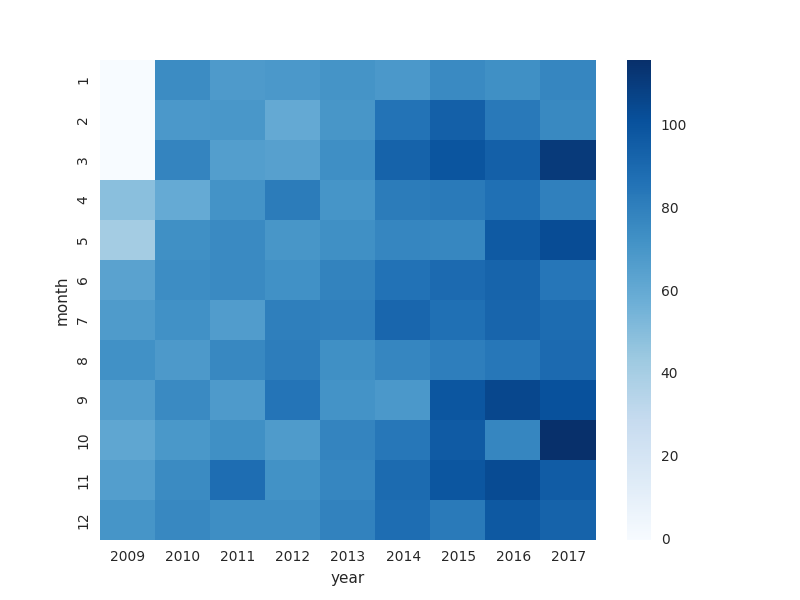

In [66]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(hm_grp_money, cmap="Blues")
display(f)